# 3. Feature Selection

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition

import statsmodels.api as sm
from scipy import stats

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from regressors import stats

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

In [2]:
labels = pd.read_excel('trial7\GSS.xls', sheet_name= "Variables")
labels = labels.iloc[:, [0,1]].T

df = pd.read_excel('trial7\GSS.xls',sheet_name= "Data",names=labels.iloc[0])
df=df.iloc[0:-2,:]
#df=df.drop(["id_"],axis=1)
df=df.drop(["year"],axis=1)
df=df.drop(["rhlthend"],axis=1)
#df=df.drop(["rincome"],axis=1)
df_backup=df.copy()
df.tail()

,wtss,conrinc,satfin,class_,health,happy,relig,polviews,partyid,hompop,race,sex,educ,age,childs,marital,wrkstat
2343,0.482425,0,Not at all sat,Working class,Good,Pretty happy,Protestant,Moderate,Independent,3.0,White,Female,12,37,2,Divorced,Working fulltime
2344,0.964850,11391.25,More or less,Working class,Excellent,Pretty happy,Protestant,Slghtly conservative,Not str republican,2.0,White,Female,12,75,4,Married,Working parttime
2345,0.964850,2453.5,Satisfied,Middle class,Excellent,Very happy,Jewish,Moderate,Independent,2.0,White,Female,12,67,3,Married,Retired
2346,0.964850,0,More or less,Middle class,Not applicable,Very happy,Protestant,Conservative,"Ind,near rep",2.0,White,Male,16,72,2,Married,Retired
2347,0.482425,0,More or less,Working class,Good,Very happy,Catholic,Don't know,Independent,1.0,White,Female,12,79,6,Widowed,Keeping house


In [3]:
df=df.replace({'Not applicable':np.nan})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wtss      2348 non-null   float64
 1   conrinc   2348 non-null   float64
 2   satfin    2348 non-null   object 
 3   class_    2348 non-null   object 
 4   health    1574 non-null   object 
 5   happy     2348 non-null   object 
 6   relig     2348 non-null   object 
 7   polviews  2348 non-null   object 
 8   partyid   2348 non-null   object 
 9   hompop    2348 non-null   float64
 10  race      2348 non-null   object 
 11  sex       2348 non-null   object 
 12  educ      2348 non-null   object 
 13  age       2348 non-null   object 
 14  childs    2348 non-null   object 
 15  marital   2348 non-null   object 
 16  wrkstat   2348 non-null   object 
dtypes: float64(3), object(14)
memory usage: 312.0+ KB


# Data processing

In [5]:
df["income"] = df["conrinc"].apply(lambda x: x+1)
df["logincome"]=np.log(df["income"])
df=df.drop(["conrinc"],axis=1)
df=df.drop(["income"],axis=1)

In [6]:
df['age'].replace({'No answer':np.nan,'89 or older':89}, inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['age'] = df['age'].astype(int)

In [7]:
#simplifying the Happy column
df["happy"].replace({'Very happy':2, 'Pretty happy':1, 'Not too happy':0, "Don't know":np.nan}, inplace=True)
df["happy"].replace({"Don't know":np.nan}, inplace=True)
#df["happy_dum"] = df["happy"].apply(lambda x: 1 if x>=1 else 0)
df= df.loc[df["happy"].isna()==False]
df.reset_index(inplace=True,drop=True)

In [8]:
df["health"].replace({'Excellent':3,'Good':2, 'Fair':1, 'Poor':0, "Don't know":np.nan}, inplace=True)

In [9]:
#df["race_black"]=df["race"].map(lambda x : 1 if x=="Black" else 0)
df["race_white"]=df["race"].map(lambda x : 1 if x=="White" else 0)
df=df.drop(["race"],axis=1)

In [10]:
df["religious"]=df["relig"].replace({'None':0})
df["religious"]=df["religious"].map(lambda x : 1 if x!=0 else 0)
df.drop("relig",axis=1,inplace=True)

In [11]:
df["childs"].replace({'Dk na':np.nan, "Eight or more":8}, inplace=True)

In [12]:
df["married"]=df["marital"].map(lambda x : 1 if x=="Married" else 0)
df=df.drop(["marital"],axis=1)

In [13]:
df["educ"].replace({'No answer':np.nan, "Don't know":np.nan}, inplace=True)

In [14]:
df["class_"].replace({'Upper class':3,'Middle class':2, 'Working class':1, 'Lower class':0,'No answer':np.nan, "Don't know":np.nan}, inplace=True)

In [15]:
df["male"]=df["sex"].replace({'Male':1, 'Female':0})
df=df.drop(["sex"],axis=1)

In [16]:
df["partyid"].replace({'Strong republican':3,'Not str republican':2,'Ind,near rep':1,'Independent':0,'Ind,near dem':-1, 'Not str democrat':-2, 'Strong democrat':-3,'No answer':np.nan, "Other party":0}, inplace=True)

In [17]:
df["polviews"].replace({'Extrmly conservative':3,'Conservative':2, 'Slghtly conservative':1, 'Moderate':0,'Slightly liberal':-1, 'Liberal':-2, 'Extremely liberal':-3,'No answer':np.nan, "Don't know":np.nan}, inplace=True)

In [18]:
df["satfin"].replace({'Satisfied':2, 'More or less':1, 'Not at all sat':0,'No answer':np.nan, "Don't know":np.nan}, inplace=True)

In [19]:
df["working"]=df["wrkstat"].replace({'Working fulltime':1,'Working parttime':1})
df["working"]=df["working"].map(lambda x : 1 if x==1 else 0)
df=df.drop(["wrkstat"],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wtss        2344 non-null   float64
 1   satfin      2336 non-null   float64
 2   class_      2331 non-null   float64
 3   health      1568 non-null   float64
 4   happy       2344 non-null   float64
 5   polviews    2246 non-null   float64
 6   partyid     2311 non-null   float64
 7   hompop      2344 non-null   float64
 8   educ        2341 non-null   float64
 9   age         2344 non-null   int32  
 10  childs      2340 non-null   float64
 11  logincome   2344 non-null   float64
 12  race_white  2344 non-null   int64  
 13  religious   2344 non-null   int64  
 14  married     2344 non-null   int64  
 15  male        2344 non-null   int64  
 16  working     2344 non-null   int64  
dtypes: float64(11), int32(1), int64(5)
memory usage: 302.3 KB


In [30]:
#metric_features=df.select_dtypes(include=np.number).set_index(df.index)
#metric_features.columns

Index(['conrinc', 'satfin', 'class_', 'health', 'happy', 'polviews', 'partyid',
       'hompop', 'educ', 'age', 'childs', 'income', 'logincome', 'happy_dum',
       'race_black', 'race_white', 'religious', 'married', 'male', 'working'],
      dtype='object')

In [21]:
non_metric_features = df[["race_white","married","male","working","religious"]].columns

In [22]:
metric_features = df.columns.drop(non_metric_features).to_list()
metric_features

['wtss',
 'satfin',
 'class_',
 'health',
 'happy',
 'polviews',
 'partyid',
 'hompop',
 'educ',
 'age',
 'childs',
 'logincome']

In [23]:
df[metric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wtss       2344 non-null   float64
 1   satfin     2336 non-null   float64
 2   class_     2331 non-null   float64
 3   health     1568 non-null   float64
 4   happy      2344 non-null   float64
 5   polviews   2246 non-null   float64
 6   partyid    2311 non-null   float64
 7   hompop     2344 non-null   float64
 8   educ       2341 non-null   float64
 9   age        2344 non-null   int32  
 10  childs     2340 non-null   float64
 11  logincome  2344 non-null   float64
dtypes: float64(11), int32(1)
memory usage: 210.7 KB


In [24]:
#fill nas
df.reset_index(drop=True,inplace=True)
scaler = MinMaxScaler().fit(df[metric_features])
dfmf_scaled = pd.DataFrame(scaler.transform(df[metric_features]), columns = df[metric_features].columns)

# get the imputed values for monthly salary missing values
imputer = KNNImputer(n_neighbors=5).fit(dfmf_scaled)
dfmf_scaled = pd.DataFrame(imputer.transform(dfmf_scaled),columns = dfmf_scaled.columns)
dfmf = pd.DataFrame(scaler.inverse_transform(dfmf_scaled),columns = dfmf_scaled.columns)
df=pd.concat([dfmf,df[non_metric_features]],axis=1)

In [25]:
# get the modes for the non_metric_features
modes = df[non_metric_features].mode().loc[0]
df.fillna(modes, inplace=True)
modes

race_white    1
married       0
male          0
working       1
religious     1
Name: 0, dtype: int64

In [26]:
df['health'] = df['health'].astype(int)
df['childs'] = df['childs'].astype(int)
df['educ'] = df['educ'].astype(int)
df['partyid'] = df['partyid'].astype(int)
df['satfin'] = df['satfin'].astype(int)
df['class_'] = df['class_'].astype(int)
df['polviews'] = df['polviews'].astype(int)
df['hompop'] = df['hompop'].astype(int)

In [27]:
df[metric_features]

,wtss,satfin,class_,health,happy,polviews,partyid,hompop,educ,age,childs,logincome
0,2.753531,0,1,2,1.0,1,1,5,14,43.0,0,0.000000
1,1.101412,1,1,3,2.0,0,0,2,10,74.0,3,0.000000
2,1.101412,1,2,2,2.0,0,0,4,16,42.0,2,11.157692
3,1.101412,2,2,1,2.0,0,0,2,16,63.0,2,11.340012
4,1.101412,2,3,3,1.0,3,3,2,18,71.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2339,0.482425,0,1,2,1.0,0,0,3,12,37.0,2,0.000000
2340,0.964850,1,1,3,1.0,0,1,2,12,75.0,4,9.340689
2341,0.964850,2,2,3,2.0,0,0,2,12,67.0,3,7.805678
2342,0.964850,1,2,2,2.0,1,0,2,16,72.0,2,0.000000


In [373]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

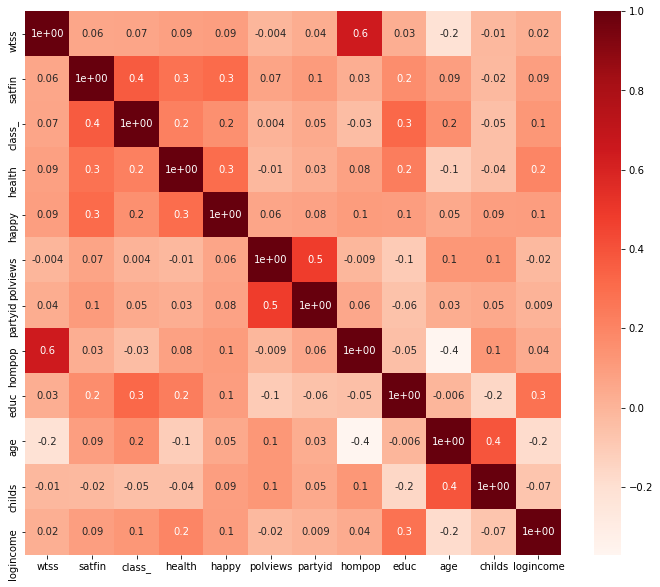

In [375]:
#num_vars=metric_features.select_dtypes(include=np.number).set_index(metric_features.index)
cor_spearman = df[metric_features].corr(method ='spearman')
cor_heatmap(cor_spearman)

In [28]:
#dropping political views because of the high correlation with party ID
df=df.drop(["partyid"],axis=1)
metric_features.remove("partyid")

In [377]:
df[["satfin","logincome"]].corr(method ='spearman')

,satfin,logincome
satfin,1.000000,0.090815
logincome,0.090815,1.000000


(array([1103.,   84.,   94.,   61.,  107.,   73.,   96.,   81.,  136.,
           0.,  114.,    0.,  114.,    0.,    0.,   81.,    0.,    0.,
           0.,   67.,    0.,    0.,    0.,   43.,    0.,    0.,   32.,
           0.,    0.,    0.,   14.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   48.]),
 array([0.0, 3653.9181968000003, 7307.8363936000005, 10961.7545904,
        14615.672787200001, 18269.590984000002, 21923.5091808,
        25577.4273776, 29231.345574400002, 32885.2637712,
        36539.181968000004, 40193.1001648, 43847.0183616,
        47500.936558400004, 51154.8547552, 54808.77295200001,
        58462.691148800004, 62116.6093456, 65770.5275424, 69424.4457392,
        73078.36393600001, 76732.2821328, 80386.2003296, 84040.11852640001,
        87694.0367232, 91347.95492, 95001.87311680001, 98655.79131360001,
        102309.7095104, 105963.62770720001, 109617.54590400001,
    

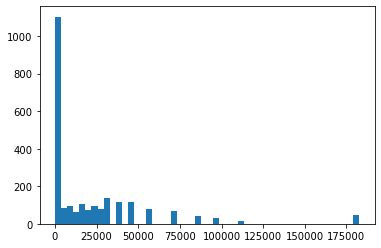

In [378]:
#visualisations
plt.hist(df_backup['conrinc'], bins=50)

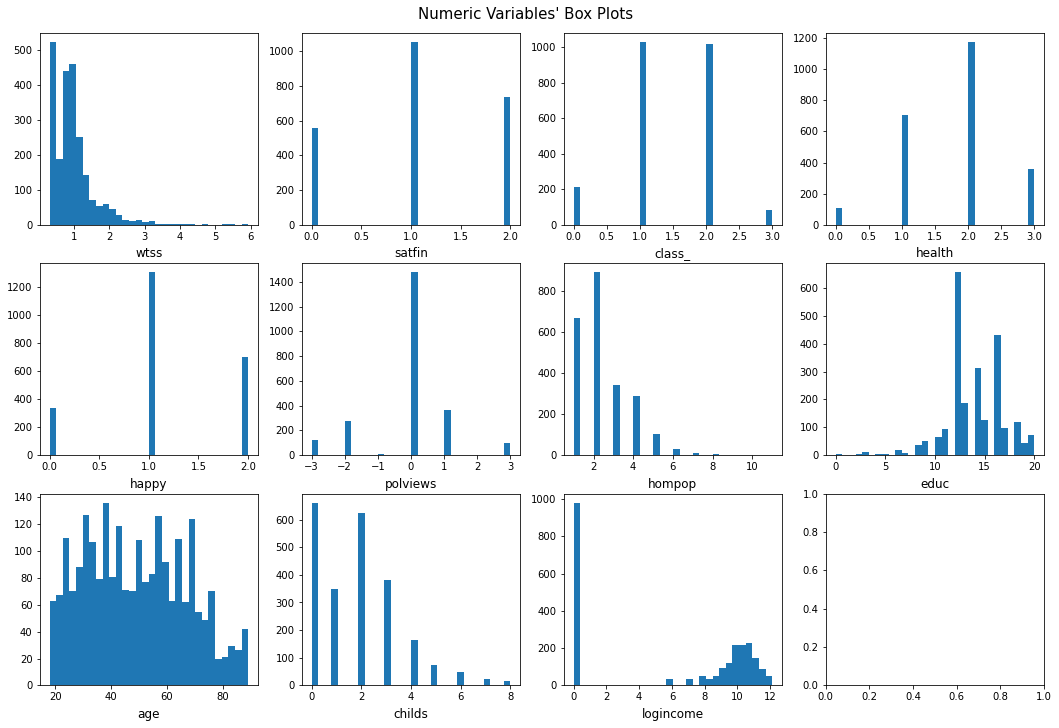

In [379]:
# plot histogram
# define numerical variables
num_vars=df[metric_features].set_index(df[metric_features].index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(18, 12))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), num_vars):
    ax.hist(num_vars[feat], bins=30)
    ax.set_title(feat, y=-0.2)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=15,  y=0.91)

plt.show()

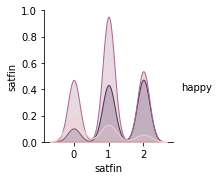

In [292]:
#plot of two of three features used
sns.pairplot(
    df,
    x_vars=["satfin"],
    y_vars=["satfin"], 
    hue="happy"
)
plt.show()

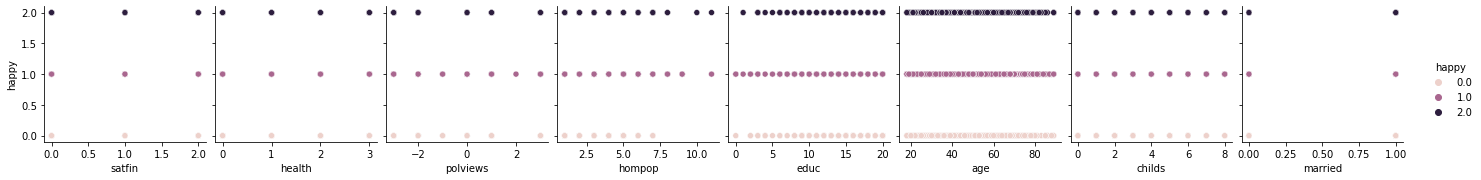

In [316]:
#plot of two of three features used
sns.pairplot(
    df,
    x_vars=['satfin', 'health', 'polviews','hompop', 'educ', 'age', 'childs', 'married'],
    y_vars=["happy"], 
    hue="happy"
)
plt.show()

__`Step 4`__ Define the independent variables as __X__ and the dependent variable ('Survived') as __y__. <br>
- _Documentation pandas.DataFrame.drop():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [293]:
X = df.drop("happy", axis = 1)
y = df["happy"]

In [258]:
df

,satfin,class_,health,happy,polviews,hompop,educ,age,childs,logincome,race_white,married,male,working,religious
0,0,1,2,1.0,0,0,14,43.0,0,0.000000,1,0,1,0,1
1,1,1,3,2.0,1,1,10,74.0,3,0.000000,1,0,0,0,1
2,1,2,2,2.0,1,1,16,42.0,2,11.157692,1,1,1,1,0
3,2,2,1,2.0,2,2,16,63.0,2,11.340012,1,1,0,1,1
4,2,3,3,1.0,2,2,18,71.0,0,0.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,0,1,2,1.0,0,0,12,37.0,2,0.000000,1,0,0,1,1
2340,1,1,3,1.0,1,1,12,75.0,4,9.340689,1,1,0,1,1
2341,2,2,3,2.0,2,2,12,67.0,3,7.805678,1,1,0,0,1
2342,1,2,2,2.0,1,1,16,72.0,2,0.000000,1,1,1,0,1


In [294]:
X=df[non_metric_features]

In [295]:
def Test_Indep():
    keep_list=[]
    for var in X:
        dfObserved = pd.crosstab(y,X[var]) 
        stat, p, dof, expected = stats.chi2_contingency(dfObserved.values)
        dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
        critical = stats.chi2.ppf(0.99, dof)
        if abs(stat) >= critical:
            keep_list.append(str(var))
    return(keep_list)
keep_list=Test_Indep()

In [296]:
X=df[keep_list]
X.head()

,race_white,married,working,religious
0,1,0,0,1
1,1,0,0,1
2,1,1,1,0
3,1,1,1,1
4,0,0,0,1


In [297]:
non_metric_features

Index(['race_white', 'married', 'male', 'working', 'religious'], dtype='object')

In [29]:
#drop male as it is not shown to be significant 
df=df.drop(["male"],axis=1)
non_metric_features = ['race_white', 'married', 'working', 'religious']

In [381]:
pd.crosstab(df.race_white, df.happy, margins=True)

happy,0.0,1.0,2.0,All
race_white,,,,
0,127,337,188,652
1,209,970,513,1692
All,336,1307,701,2344


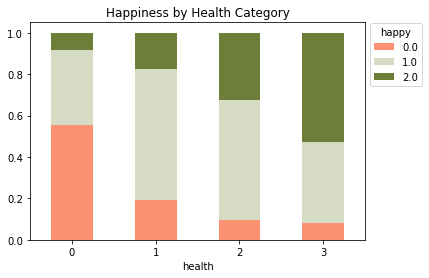

In [382]:
#https://stackoverflow.com/questions/43544694/using-pandas-crosstab-to-create-a-bar-plot
ct = pd.crosstab(df.health, df.happy , normalize="index")
    
ax = ct.plot(kind='bar', stacked=True, rot=0, color = ("#FC9272","#D5DCC3","#6D7E39"))
plt.title("Happiness by Health Category")
ax.legend(title='happy', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
#for c in ax.containers:
    
    # set the bar label
#    ax.bar_label(c, label_type='center')

# Linear regressions

In [383]:
#try with recommended variables
X = df[["logincome","married","childs"]]
y = df['happy']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est1 = est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     73.40
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.27e-45
Time:                        14:35:27   Log-Likelihood:                -2198.7
No. Observations:                2344   AIC:                             4405.
Df Residuals:                    2340   BIC:                             4428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9414      0.026     36.156      0.0

In [321]:
X = df[["logincome","married","satfin"]]
y = df['happy']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           8.83e-88
Time:                        13:51:22   Log-Likelihood:                -2100.6
No. Observations:                2344   AIC:                             4209.
Df Residuals:                    2340   BIC:                             4232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7268      0.027     27.344      0.0

In [322]:
#with the variables recommended in the second paper
X = df[["logincome","married","religious","age","educ"]]
y = df['happy']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     46.48
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           6.40e-46
Time:                        13:51:42   Log-Likelihood:                -2193.1
No. Observations:                2344   AIC:                             4398.
Df Residuals:                    2338   BIC:                             4433.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7071      0.074      9.589      0.0

In [385]:
X=df[['satfin', 'health', 'polviews',  'childs', 'married']]
#using backward elimination, we get this model
#X = df['satfin', 'class_', 'health', 'polviews', 'hompop', 'educ','age', 'childs', 'logincome', 'race_white', 'married', 'working','religious']
y = df['happy']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 29 Jan 2022   Prob (F-statistic):          6.15e-116
Time:                        14:36:49   Log-Likelihood:                -2030.2
No. Observations:                2344   AIC:                             4072.
Df Residuals:                    2338   BIC:                             4107.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4544      0.035     12.943      0.0

In [400]:
#X=df[['satfin', 'health', 'polviews',  'childs', 'married']]
#using backward elimination, we get this model
X = df[['satfin', 'health', 'married']]
y = df['happy']
X2 = sm.add_constant(X)
est = sm.WLS(y, X2, weights=df['wtss'])
est2 = est.fit()
print(est2.summary())

                            WLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.195
Model:                            WLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sat, 29 Jan 2022   Prob (F-statistic):          1.75e-109
Time:                        14:46:27   Log-Likelihood:                -2184.3
No. Observations:                2344   AIC:                             4377.
Df Residuals:                    2340   BIC:                             4400.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4872      0.034     14.459      0.0

In [302]:
df.columns

Index(['satfin', 'class_', 'health', 'happy', 'polviews', 'hompop', 'educ',
       'age', 'childs', 'logincome', 'race_white', 'married', 'working',
       'religious'],
      dtype='object')

In [339]:
X = df[['satfin', 'health', 'polviews',  'childs', 'married']]
y = df['happy']

In [342]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LinearRegression()

for i in range(1,6):

    rfe = RFE(model,n_features_to_select= i)
    fit = rfe.fit(x_train, y_train)
    acc = fit.score(x_test, y_test)

    print(acc)
    print(fit.support_)

0.09005390446228034
[False False False False  True]
0.17824655598599848
[False  True False False  True]
0.23789811638345026
[ True  True False False  True]
0.23917202611479937
[ True  True False  True  True]
0.24191632241774597
[ True  True  True  True  True]


In [340]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify=y)

In [341]:
X_train

,satfin,health,polviews,childs,married
109,0,1,0,2,1
2201,1,1,0,2,1
379,2,1,0,2,1
1161,2,1,0,0,1
325,0,0,0,8,0
...,...,...,...,...,...
1881,2,2,0,0,0
176,2,2,-3,3,1
1536,1,1,0,8,1
1187,2,2,1,3,1


In [343]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.021552


In [345]:
model = LinearRegression().fit(X_train, y_train)
rfe = RFE(estimator = model, n_features_to_select = 3)
X_rfe = rfe.fit_transform(X = X_train, y = y_train)

selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features
#GoogleAnalytics_PageValue, Months_high, Type_of_Visitor_new

satfin       True
health       True
polviews    False
childs      False
married      True
dtype: bool

<a class="anchor" id="4th-bullet">


### 1.4. Test out decision trees

</a>



In [303]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X.columns,
                               filled=True, 
                              rounded=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    nodes = pydot_graph.get_node_list()

    for node in nodes:
        node.set_fillcolor("#e1ebff")
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [304]:
from sklearn.tree import DecisionTreeRegressor
dt_gini = DecisionTreeRegressor(max_depth= 2)

In [305]:
X = df.drop(["happy"],axis=1)
y = df['happy']
dt_gini.fit(X, y)

DecisionTreeRegressor(max_depth=2)

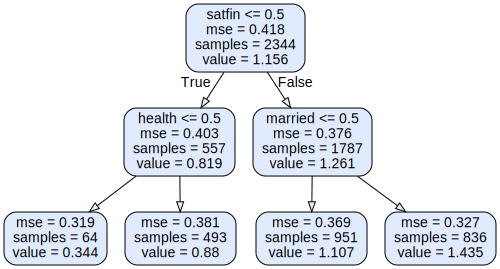

In [306]:
plot_tree(dt_gini)

In [105]:
#visualizations:
#proportion plots (as above)
#!pip install kmodes
from kmodes.kmodes import KModes
from math import pi

In [35]:
#clustering

In [95]:
dfc = df.copy()

In [96]:
dfc = dfc[['satfin','health','married']]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3462.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2962.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

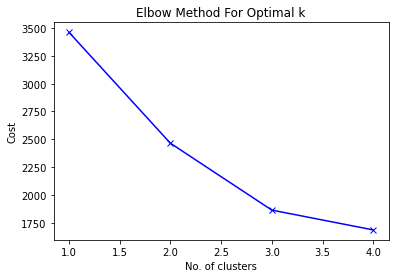

In [37]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(dfc)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [97]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(dfc)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 443, cost: 2367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 187, cost: 2536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2275.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 541, cost: 2033.0
Run 4, iteration: 2/100, moves: 18, cost: 2033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 266, cost: 2242.0
Best run was number 4


array([0, 0, 0, ..., 2, 0, 0], dtype=uint16)

In [98]:
dfc.insert(0, "merged_labels", clusters, True)

In [100]:
#groupby
dfcc = pd.concat([dfc,df[["happy",'age','logincome']]], axis=1)
dfcc

,merged_labels,satfin,health,married,happy,age,logincome
0,0,0,2,0,1.0,43.0,0.000000
1,0,1,3,0,2.0,74.0,0.000000
2,0,1,2,1,2.0,42.0,11.157692
3,2,2,1,1,2.0,63.0,11.340012
4,2,2,3,0,1.0,71.0,0.000000
...,...,...,...,...,...,...,...
2339,0,0,2,0,1.0,37.0,0.000000
2340,2,1,3,1,1.0,75.0,9.340689
2341,2,2,3,1,2.0,67.0,7.805678
2342,0,1,2,1,2.0,72.0,0.000000


In [101]:
dfcc.groupby('merged_labels').aggregate(["mean","std","count"])

satfin                    health                   married  \
                   mean       std count      mean       std count      mean   
merged_labels                                                                 
0              0.944589  0.641201  1155  1.939394  0.647457  1155  0.280519   
1              0.716088  0.675568   634  1.000000  0.000000   634  0.302839   
2              1.762162  0.524844   555  2.263063  0.778308   555  0.866667   

                                  happy                        age             \
                    std count      mean       std count       mean        std   
merged_labels                                                                   
0              0.449448  1155  1.109957  0.625176  1155  47.377489  18.487136   
1              0.459849   634  0.943218  0.605342   634  49.843849  17.992782   
2              0.340241   555  1.493694  0.604926   555  51.234234  16.824404   

                    logincome                  
              count      mean       std count  
merged_labels                                  
0              1155  5.877788  4.935594  1155  
1               634  5.080807  4.926428   634  
2               555  6.478947  5.169487   555

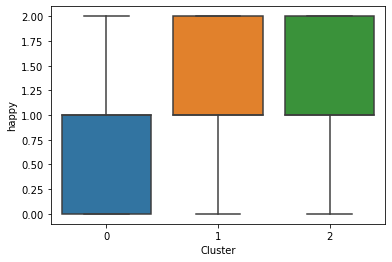

In [90]:
sns.boxplot(data = dfcc, x = 'Cluster', y = 'happy')
plt.show()

In [140]:
final_cluster_list = ["Cluster 2","Cluster 3","Cluster 1"]

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_normalized[metric_features])
data_normalized[metric_features] = scaled_data
data_normalized[metric_features].head()

In [111]:
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(dfcc)
dfcc_scaled = pd.DataFrame(scaler.transform(dfcc), columns = dfcc.columns)
dfcc_scaled

,merged_labels,satfin,health,married,happy,age,logincome
0,-1.0,-1.0,0.333333,-1.0,0.0,-0.295775,-1.000000
1,-1.0,0.0,1.000000,-1.0,1.0,0.577465,-1.000000
2,-1.0,0.0,0.333333,1.0,1.0,-0.323944,0.841874
3,1.0,1.0,-0.333333,1.0,1.0,0.267606,0.871971
4,1.0,1.0,1.000000,-1.0,0.0,0.492958,-1.000000
...,...,...,...,...,...,...,...
2339,-1.0,-1.0,0.333333,-1.0,0.0,-0.464789,-1.000000
2340,1.0,0.0,1.000000,1.0,0.0,0.605634,0.541930
2341,1.0,1.0,1.000000,1.0,1.0,0.380282,0.288535
2342,-1.0,0.0,0.333333,1.0,1.0,0.521127,-1.000000


In [113]:
dfcc_scaled.drop('merged_labels', inplace=True, axis=1)
dfcc_scaled.insert(0, "merged_labels", clusters, True)

       index    satfin    health   married     happy       age logincome
0  Cluster 2 -0.055411  0.292929 -0.438961  0.109957 -0.172465 -0.029714
1  Cluster 3 -0.283912 -0.333333 -0.394322 -0.056782  -0.10299 -0.161277
2  Cluster 1  0.762162  0.508709  0.733333  0.493694 -0.063824  0.069523


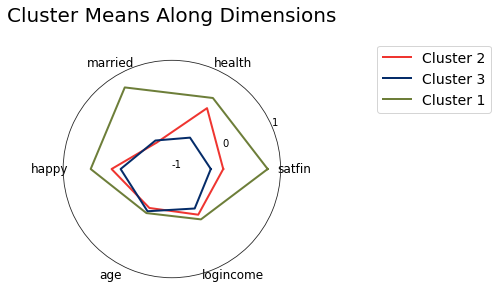

In [141]:
plot_radar(dfcc_scaled)

In [138]:
def plot_radar(df):
    # calculate the centroid of each cluster 
    centroidsDict = dict()
    for cluster in sorted(np.unique(df['merged_labels'])):
        centroidsDict[cluster] = df[df['merged_labels'] == cluster].mean()

    # create the radar dataframe
    cols = df.columns.drop('merged_labels')
    dfRadar = pd.DataFrame(columns = cols, index=[str(final_cluster_list[c]) for c in sorted(np.unique(df['merged_labels']))])
    for c in sorted(np.unique(df['merged_labels'])):
        dfRadar.loc[final_cluster_list[c]] = centroidsDict[c]
    dfRadar.reset_index(inplace = True)
    print(dfRadar)
    
    # produce the plot
    # number of variables
    categories=list(dfRadar)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    #ax.set_rlabel_position(0)
    plt.yticks([-1, 0, 1], ["-1","0","1"], color='black', size=10)
    plt.ylim(-1,1)

    colors = ["#ef3530","#052c69","#6D7E39"]
    for cluster in range(len(dfRadar)):
        values=dfRadar.loc[cluster].drop('index').values.flatten().tolist()
        values += values[:1]

        # Plot data
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[cluster], label = final_cluster_list[cluster])

    # Fill area
    ax.fill(angles, values, 'w', alpha=0.1)

    ax.grid(color='#AAAAAA')
    ax.spines['polar'].set_color('#222222')

    # Change the background color inside the circle itself.
    ax.set_facecolor('w')

    # Add title.
    ax.set_title('Cluster Means Along Dimensions', y=1.15, fontsize=20)

    # Add a legend as well.
    ax.legend(loc='upper right', bbox_to_anchor=(2, 1.1), fontsize=14);

    # Show the graph
    plt.show();

In [52]:
df[[race_white]].groupby('happy').aggregate(["mean","std","count"])

wtss                    satfin                    class_            \
           mean       std count      mean       std count      mean       std   
happy                                                                           
0.0    0.889218  0.589277   336  0.633929  0.724771   336  1.175595  0.750403   
1.0    1.012897  0.676807  1307  1.033665  0.716529  1307  1.402448  0.686956   
2.0    1.031751  0.595893   701  1.368046  0.660134   701  1.550642  0.681859   

               health  ... race_white   married                   working  \
      count      mean  ...      count      mean       std count      mean   
happy                  ...                                                  
0.0     336  1.327381  ...        336  0.181548  0.386046   336  0.511905   
1.0    1307  1.709258  ...       1307  0.385616  0.486927  1307  0.601377   
2.0     701  2.068474  ...        701  0.616262  0.486642   701  0.617689   

                      religious                  
            std count      mean       std count  
happy                                            
0.0    0.500604   336  0.744048  0.437046   336  
1.0    0.489802  1307  0.754399  0.430608  1307  
2.0    0.486299   701  0.810271  0.392367   701  

[3 rows x 42 columns]